In [ ]:
#@title Setup (click the "run" button to the left) {display-mode: "form"}

## Setup ##

# imports

# built-in Python libraries
# -------------------------

from __future__ import print_function

import pandas as pd
pd.__version__

import numpy as np


In [ ]:
from google.colab import drive
from google.colab import auth
auth.authenticate_user()

from pydrive.drive import GoogleDrive
from pydrive.auth import GoogleAuth
from oauth2client.client import GoogleCredentials
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)


myfile = drive.CreateFile({'id': '10KBFWDvjco2gFA5Yz5s2pSwW__vXYo8E'})
myfile.GetContentFile('achats1.csv')

In [ ]:

df = pd.read_csv('achats1.csv')
df.keys()
#df['variety']
print(df.head(3))
print('\n')
print("liste des attributs : ", list(df.columns))
print('\n')
print("nombre total d'attributs : ", len(list(df.columns))-1)


  Age Genre      CSP  T
0  YA     F  Employe  0
1   A     M  Employe  0
2   S     M    Cadre  1


liste des attributs :  ['Age', 'Genre', 'CSP', 'T']


nombre total d'attributs :  3


In [ ]:
target = df['T']
target.columns = ['T']
features_dataframe = df.loc[:, df.columns != 'T']

In [ ]:
features_dataframe = pd.get_dummies(features_dataframe) 
features_dataframe.columns

Index(['Age_A', 'Age_S', 'Age_Y', 'Age_YA', 'Genre_F', 'Genre_M', 'CSP_Cadre',
       'CSP_Employe', 'CSP_Ouvrier'],
      dtype='object')

In [ ]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
le.fit(target.values)

k = le.transform(target.values)
print(k)
print(features_dataframe)

[0 0 1 0 1 0 0 0 0 1 1 0 1 0 0 1 1 0 0 0 1 0 0 1 1 0 0 1 1 0 1 0 0 0 0 0 0
 1 1 1 0 0 1 1 0 1 1 1 1 1 1 1 1 0 0 1 1 1 1 0 0 0 0 0 0 1 0 1 1 1 1 1 0 1
 0 0 1 0 0 1 0 0 0 0 1 0 1 0 0 1 0 0 1 0 1 1 0 1 1 0 0 0 1 1 0 1 1 0 0 0 1
 0 1 0 0 0 0 1 1 0 1 0 0 1 1 0 0 0 1 0 0 1 1 0 0 1 1 0 1 0 0 0 0 0 0 1 1 1
 0 0 1 1 0 1 1 1 1 1 1 1 1 0 0 1 1 1 1 0 0 0 0 0 0 1 0 1 1 1 1 1 0 1 0 0 1
 0 0 1 0 0 0 0 1 0 1 0 0 1 0 0 1 0 1 1 0 1 1 0 0 0 1 1 0 1 1 0]
     Age_A  Age_S  Age_Y  Age_YA  ...  Genre_M  CSP_Cadre  CSP_Employe  CSP_Ouvrier
0        0      0      0       1  ...        0          0            1            0
1        1      0      0       0  ...        1          0            1            0
2        0      1      0       0  ...        1          1            0            0
3        0      0      0       1  ...        0          0            1            0
4        1      0      0       0  ...        1          1            0            0
..     ...    ...    ...     ...  ...      ...        ...

In [ ]:
from sklearn.model_selection import train_test_split

X = features_dataframe
y = k
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=1)

In [ ]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(criterion="entropy", max_depth=3 )
clf.fit(X, y)


DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=3, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

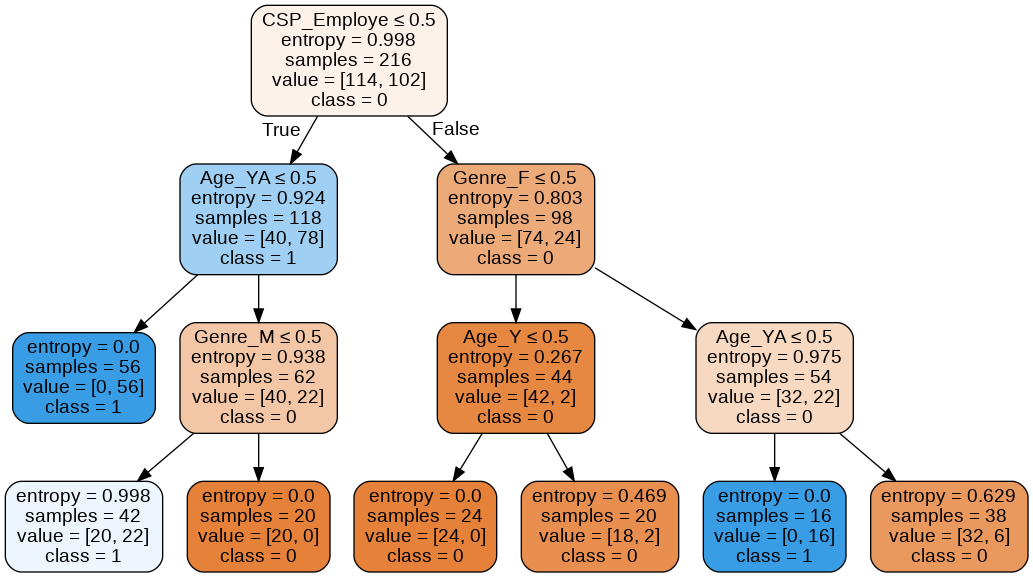

In [ ]:
from sklearn.tree import export_graphviz

from sklearn.externals.six import StringIO
from IPython.display import Image

import pydotplus
dot_data = StringIO()

export_graphviz(clf, out_file=dot_data, 
                special_characters = True ,
                feature_names = features_dataframe.columns,
                class_names=['0','1'],
                rounded = True, filled = True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())